In [1]:
%tensorflow_version 
%tensorflow_version 2.x

Currently selected TF version: 2.x
Available versions:
* 1.x
* 2.x


In [0]:
%matplotlib inline


import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
##從tensorflow keras datasets中抓出fashion mnist
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import KFold
##讀取資料
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
print(
    "train images length :",len(train_images),
    "\ntrain labels length :",len(train_labels),
    "\ntest images length  :",len(test_images),
    "\ntest labels length  :",len(test_labels))

train images length : 60000 
train labels length : 60000 
test images length  : 10000 
test labels length  : 10000


train images max value  : 255 
train value max label : 9 
shape : (60000, 28, 28)


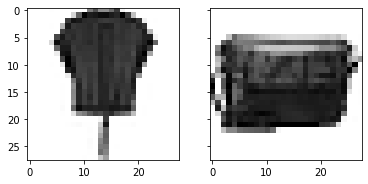

In [5]:
def graph_show_and_find_the_max_value(n):
    f,(ax1, ax2) = plt.subplots(1,2, sharey=True)
    ax1.imshow(train_images[n],cmap='Greys')
    ax2.imshow(test_images[n],cmap ='Greys')
    max_value_images=np.amax(train_images)
    max_value_labels=max(train_labels)
    shape = train_images.shape
    print("train images max value  :" , max_value_images,
          "\ntrain value max label :",max_value_labels,
          "\nshape :" , shape)



##check function can work 
graph_show_and_find_the_max_value(56)

In [6]:
train_images.shape[2]

28

In [0]:
##reshape datasets (format=(total,dimension1,dimension2,1))
def reshape_data(dataset1,dataset2,dataset3):
    shape =dataset1.shape
    max_value_images=np.amax(dataset1)
    train=dataset1.reshape(shape[0],shape[1],shape[2],1)/max_value_images
    shape2 =dataset2.shape
    max_value_images2=np.amax(dataset2)
    validation=dataset2.reshape(shape2[0],shape2[1],shape2[2],1)/max_value_images2
    shape3 =dataset3.shape
    max_value_images3=np.amax(dataset3)
    test=dataset3.reshape(shape3[0],shape2[1],shape3[2],1)/max_value_images3
    return train ,validation ,test

In [0]:
##splite to two part (train and validation)
x_train= train_images[0:49999,:]
val_train = train_images[50000:60000,:]

x_labels = train_labels[0:49999,]
val_labels =  train_labels[50000:60000,]


##reshape datasets
x_train,val_train,test_images = reshape_data(x_train,val_train,test_images)


In [9]:
val_train.shape

(10000, 28, 28, 1)

In [0]:
##將y labele改成one hot encoding
from tensorflow.keras.utils import to_categorical
x_labels = to_categorical(x_labels,10)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.layers import Dense ,Flatten
from tensorflow.keras.optimizers import SGD 

In [0]:
##STEP 1 打造函數學習機(CNN)

#1.修改神經元數量 153
#2.修改batch_size數 300
#3.修改epochs數 20
#4.修改optimizer變成adam
#5.loss變成sparse_categorical_crossentropy 
#6.kernel_initializer變成he_uniform 


##cnn elements
neurons_cnn = 32
filter_size = (3,3)
neurons_dense = 153
activation_function = 'relu'
num_classes = 10
out_activation_function ='softmax'
##多少要回頭驗算
batch_size = 300
##來回多少次
epochs = 20
##輸出的矩陣大小相同
padding_condition = 'same'
##灰階
input_shape_grey = (28,28,1)
##矩陣切的形狀
pool_size = (2,2)


def model_building(neurons_for_cnn,yuor_filter_size,neurons_for_dense,input_activation_function,class_number,output_activation_function,your_paading_condition,input_shape_matrix,pool_size_matrix):
    model = Sequential()
    model.add(Conv2D(neurons_for_cnn,yuor_filter_size,padding=your_paading_condition,input_shape=input_shape_matrix,activation=input_activation_function))
    model.add(MaxPooling2D(pool_size = pool_size_matrix))
    model.add(Conv2D(64,yuor_filter_size,padding=your_paading_condition,activation=input_activation_function))
    model.add(MaxPooling2D(pool_size = pool_size_matrix))
    model.add(Conv2D(128,yuor_filter_size,padding=your_paading_condition,activation=input_activation_function))
    model.add(MaxPooling2D(pool_size=pool_size_matrix))
    model.add(Flatten())
    model.add(Dense(neurons_for_dense,activation=input_activation_function, kernel_initializer='he_uniform'))
    model.add(Dense(class_number,activation=output_activation_function))
    model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy']) 
    return model

In [0]:
# evaluate a model using k-fold cross-validation
def evaluate_model(x_train,x_labels, n_folds=5):
	scores, histories = list(), list()
	# prepare cross validation
	kfold = KFold(n_folds, shuffle=True, random_state=10)
	# enumerate splits
	for train_ix, test_ix in kfold.split(x_train):
		model = model_building(neurons_cnn,filter_size,neurons_dense,activation_function,num_classes,out_activation_function,padding_condition,input_shape_grey,pool_size)
		# select rows for train and test
		trainX, trainY, testX, testY = x_train[train_ix], x_labels[train_ix],x_train[test_ix],x_labels[test_ix]
		# fit model
		history = model.fit(trainX, trainY, epochs=1000, batch_size=32, validation_data=(testX, testY), verbose=0)
		# evaluate model
		_, acc = model.evaluate(testX, testY, verbose=0)
		print('> %.3f' % (acc * 100.0))
		# append scores
		scores.append(acc)
		histories.append(history)
	return scores, histories
# plot diagnostic learning curves
def summarize_diagnostics(histories):
	for i in range(len(histories)):
		# plot loss
		pyplot.subplot(211)
		pyplot.title('Cross Entropy Loss')
		pyplot.plot(histories[i].history['loss'], color='blue', label='train')
		pyplot.plot(histories[i].history['val_loss'], color='orange', label='test')
		# plot accuracy
		pyplot.subplot(212)
		pyplot.title('Classification Accuracy')
		pyplot.plot(histories[i].history['accuracy'], color='blue', label='train')
		pyplot.plot(histories[i].history['val_accuracy'], color='orange', label='test')
	pyplot.show()
 # summarize model performance
def summarize_performance(scores):
	# print summary
	print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
	# box and whisker plots of results
	pyplot.boxplot(scores)
	pyplot.show()
 
# run the test harness for evaluating a model
def run_test_harness():
	# evaluate model
	scores, histories = evaluate_model(x_train,train_labels)
	# learning curves
	summarize_diagnostics(histories)
	# summarize estimated performance
	summarize_performance(scores)
 
# entry point, run the test harness
run_test_harness()

In [29]:
model = model_building(neurons_cnn,filter_size,neurons_dense,activation_function,num_classes,out_activation_function,padding_condition,input_shape_grey,pool_size)
model.summary()

#summary計算
#第一層:(3*3+1)*32 =320
#第二層:(3*3)*32*64 =18496
#第三層:(3*3)*128*64 =73856
#flatten:14*14*32=6272


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 3, 3, 128)         0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1152)             

In [30]:
model.fit(x_train,x_labels,validation_data=(val_train,val_labels),batch_size=batch_size,epochs=epochs)

Epoch 1/20
167/167 [==============================] - 73s 440ms/step - loss: 0.7155 - accuracy: 0.7456 - val_loss: 0.4942 - val_accuracy: 0.8220
Epoch 2/20
167/167 [==============================] - 74s 441ms/step - loss: 0.3936 - accuracy: 0.8594 - val_loss: 0.3516 - val_accuracy: 0.8747
Epoch 3/20
167/167 [==============================] - 74s 441ms/step - loss: 0.3270 - accuracy: 0.8828 - val_loss: 0.3134 - val_accuracy: 0.8893
Epoch 4/20
167/167 [==============================] - 74s 441ms/step - loss: 0.2942 - accuracy: 0.8949 - val_loss: 0.3112 - val_accuracy: 0.8876
Epoch 5/20
167/167 [==============================] - 74s 441ms/step - loss: 0.2712 - accuracy: 0.9020 - val_loss: 0.3015 - val_accuracy: 0.8861
Epoch 6/20
167/167 [==============================] - 78s 467ms/step - loss: 0.2535 - accuracy: 0.9083 - val_loss: 0.2664 - val_accuracy: 0.9015
Epoch 7/20
167/167 [==============================] - 74s 441ms/step - loss: 0.2412 - accuracy: 0.9125 - val_loss: 0.2491 - val_ac

In [31]:
result = model.predict_classes(test_images)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [32]:
from sklearn import metrics
result = model.predict_classes(test_images)
print('\n\n the result \n\n Confusion Matrix\n\n',metrics.confusion_matrix(result, test_labels))
print("\n",metrics.classification_report(result, test_labels, digits=3))



 the result 

 Confusion Matrix

 [[829   3  13  15   0   0  66   0   2   0]
 [  0 977   0   1   0   0   0   0   0   0]
 [ 14   1 870  10  30   0  51   0   2   1]
 [ 20  15  10 925  22   0  28   0   3   0]
 [ 12   2  73  27 926   0 119   0   6   0]
 [  2   0   0   0   0 975   0   3   1   7]
 [115   0  33  20  22   0 732   0   1   0]
 [  0   0   0   0   0  20   0 990   4  51]
 [  8   2   1   2   0   0   4   0 981   0]
 [  0   0   0   0   0   5   0   7   0 941]]

               precision    recall  f1-score   support

           0      0.829     0.893     0.860       928
           1      0.977     0.999     0.988       978
           2      0.870     0.889     0.879       979
           3      0.925     0.904     0.914      1023
           4      0.926     0.795     0.855      1165
           5      0.975     0.987     0.981       988
           6      0.732     0.793     0.761       923
           7      0.990     0.930     0.959      1065
           8      0.981     0.983     0.982 

In [0]:
model.save('手寫辨識cnn.h5')